### Evaluation Metrics:

It is a technique used in the Machine Learning Models that is used to evaluate the performance of the model.

### Kinds of Evaluation metrics:

1.   Accuracy

2.   Precision

3.   Recall

4.   F1-score

5.   Confusion matrix

6.   ROC-AUC


### Steps used in this Algorithm:---

1.  Import all the necessary libraries

2.  Download all the necessary NLTK libraries

3.  Create Sample Dataset

4.  Perform the Text Preprocessing Function

5.  Apply Cleaning

6.  Convert Text to Numerical Features (TF-IDF)

7.  Divide the dataset into independent and dependent features

8.  Perform the Train-Test Split

9.  Train Logistic Regression Model

10.  Make Predictions for the model

11. Evaluate the Model

12. Plot ROC Curve

13. Test with Custom Sentence

### Step 1: Import all the necessary libraries

In [1305]:
import  numpy              as   np
import  pandas             as   pd
import  matplotlib.pyplot  as   plt
import  seaborn            as   sns

import nltk

from    nltk.tokenize                   import  RegexpTokenizer, word_tokenize
from    sklearn.feature_extraction.text import  TfidfVectorizer
from    nltk.corpus                     import  stopwords

from    sklearn.model_selection         import train_test_split
from    sklearn.preprocessing           import StandardScaler
from    sklearn.linear_model            import LogisticRegression
from    sklearn.metrics                 import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

### OBSERVATIONS:

1.  numpy  ------------------>  Computation of the numerical array

2.  pandas ------------------>  Data Cleaning and Manipulation

3.  matplotlib -------------->  Data Visualization

4.  seaborn   --------------->  Data Correlation

5.  nltk -------------------->  Contains all the library for text preprocessing

6.  tokenize ---------------->  breaks the text into sub parts

7.  word_tokenize ----------->  breaks the text into words

8.  corpus ------------------>  contains a series of text

9.  stopwords --------------->  words having no meaning

10. feature_extraction ------>  extracting all the essential information from the features

11. TfidfVectorizer  -------->  converts the text into Tfidf score matrix

12. train_test_split -------->  split the data into training and testing data

13. StandardScaler ---------->  sclaes the data in one range between 0 to 1

14. LogisticRegression  ------> provides the result in 1 or 0 in a binary classification problem

15.  metrics  ----------------> evaluates the performace of the model.

### Step 2: Download all the necessary NLTK libraries

In [1306]:
nltk.download('punkt_tab')
nltk.download('average_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger_eng: Package
[nltk_data]     'average_perceptron_tagger_eng' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### OBSERVATIONS:

1.  Here the additional resources for NLTK library are downloaded.

### Step 3: Create Sample Dataset

In [1307]:
# Sample dataset (Binary Sentiment Classification)

data = {
    "text": [
        "I love this product",
        "This is amazing",
        "I am very happy",
        "I hate this",
        "This is terrible",
        "Very bad experience",
        "Absolutely fantastic",
        "Worst purchase ever",
        "I really enjoyed it",
        "Not good at all"
    ],
    "label": [1,1,1,0,0,0,1,0,1,0]  # 1 = Positive, 0 = Negative
}


### Construct the dataframe from the above data

df = pd.DataFrame(data)

print(df)

                   text  label
0   I love this product      1
1       This is amazing      1
2       I am very happy      1
3           I hate this      0
4      This is terrible      0
5   Very bad experience      0
6  Absolutely fantastic      1
7   Worst purchase ever      0
8   I really enjoyed it      1
9       Not good at all      0


### OBSERVATIONS:

1. A dataset is constructed with two columns .

     (a.)  text ------------>  It contains all the text informations

     (b.)  label ----------->  It contains the labels in form of 0 or 1.

### Step 4: Perform the Text Preprocessing Function

In [1308]:
reg = RegexpTokenizer(r'\w+')

In [1309]:
### perform the function definition

def clean_text(text):
    ### convert all the text into lower case
    text = text.lower()

    ### perform the normalization on the text by performing the regular expression tokenization
    text = reg.tokenize(text)

    ### convert the words in list to strings
    text = " ".join(text)

    ### perform the word tokenization on the sentences
    words = word_tokenize(text)

    ### define all the english stopwords
    english_stopwords = stopwords.words("english")

    ### remove all the english stopwords from the filtered text
    res = [x for x in words if(x not in english_stopwords)]

    ### convert the words in list to strings
    res = " ".join(res)

    return(res)

### Step 5: Apply Cleaning

In [1310]:
### perform the function call

df['clean_text'] = df['text'].apply(clean_text)

In [1311]:
df['clean_text']

0            love product
1                 amazing
2                   happy
3                    hate
4                terrible
5          bad experience
6    absolutely fantastic
7     worst purchase ever
8          really enjoyed
9                    good
Name: clean_text, dtype: object

### Step 6: Convert Text to Numerical Features (TF-IDF)


Q.>  Why Tfidf Vectoization is used in Logistic Regression ?

Ans:>

1.   Logistic Regression can easily work with the high dimensional data and sparse matrix.

     After applying Tfidf vectorizer on the text, the text becomes high dimendional sparse data.

     So here Tfidf vectorizer can easily be used in Logistic Regression.


2.  Logistic Regression is a linear model.

    Tfidf vectorizer produces the output in the form of the numerical data. The most important words have been assigned with the higher weights and the common words have been given lower weights, so as to reduce its imprtance.


3. Tfidf Vectorizer reduces the noise. It is used in Logistic Regression so as to reduce the influence of common words.


4.  Logistic Regression works well with L2-regularized data.

    Tfidf Vectorizer even produces normalized results so as to improve the generalization of the model.

    So Tfidf Vectorizer is used in Logistic Regression.

In [1312]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Create an object for TfidfVectorizer

tfidf = TfidfVectorizer()

### using the object of tfidf vectorizer, transform the inputs into numerical vectors
ans = tfidf.fit_transform(df['clean_text'])

In [1313]:
ans

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (10, 16)>

### OBSERVATIONS:

1.  The text is now converted into the sparse matrix having maximum non-zeros values using tfidfvectorizer.

### Step 7: Divide the dataset into independent and dependent features

In [1314]:
X = ans                   ### independent features

Y = df['label']           ### dependent features

In [1315]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (10, 16)>

In [1316]:
Y

0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: label, dtype: int64

In [1317]:
### Show the vectorized matrix data

X_vectorized = X.toarray() ### sparse matrix is converted into numpy array for better view and visibility

In [1318]:
X_vectorized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70710678, 0.70710678, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

### OBSERVATIONS:

1. The important words are marked with the weight values greater than 0

2. The most common words are marked with the weight values marked with 0.

In [1319]:
Y.value_counts()

label
1    5
0    5
Name: count, dtype: int64

### Step 8: Perform the Train-Test Split

In [1320]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [1321]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (7, 16)>

In [1322]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 16)>

In [1323]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (7, 16)
Shape of the input testing  data is: (3, 16)


In [1324]:
Y_train

1    1
9    0
4    0
6    1
2    1
0    1
5    0
Name: label, dtype: int64

In [1325]:
Y_test

3    0
7    0
8    1
Name: label, dtype: int64

In [1326]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (7,)
Shape of the output testing  data is: (3,)


### OBSERVATIONS:

1. After applying the train_test_split function of the input and the output, the data is divided into the training and the testing data.

    Training data is 70 %

    Testing  data is 30 %.

### Step 9: Train Logistic Regression Model

In [1327]:
from sklearn.linear_model import LogisticRegression

### create the object for LogisticRegression

log = LogisticRegression()

### using the object for logistic regression, train the model

log.fit(X_train, Y_train)

LogisticRegression()

### OBSERVATIONS:

1. First the object for Logistic Regression is created.

2. Using the object for Logistis Regression, the model is trained using the training data.

### Step 10: Make Predictions for the model

In [1328]:
Y_pred = log.predict(X_test)

In [1329]:
Y_pred

array([1, 1, 1])

### Step 11:  Evaluate the Model

In [1330]:
### Find the accuracy of the model

ac = accuracy_score(Y_test, Y_pred)

print("Accuracy score of the model is:", (ac*100.0))

Accuracy score of the model is: 33.33333333333333


In [1331]:
### Find out the precision score of the model

precision=precision_score(Y_test, Y_pred,zero_division=0)

print("Precision value of the model is:", precision)

Precision value of the model is: 0.3333333333333333


In [1332]:
### Find out the recall score of the model

recall = recall_score(Y_test, Y_pred)

print("Recall score of the model is:", recall)

Recall score of the model is: 1.0


In [1333]:
### Find out the f1  score of the model

f1 = f1_score(Y_test, Y_pred)

print("F1 Score of the model is:", f1)

F1 Score of the model is: 0.5


In [1334]:
### Find out the confusion matrix of the model

cm = confusion_matrix(Y_test, Y_pred)

print("Confusion matrix of the model is:", cm)

Confusion matrix of the model is: [[0 2]
 [0 1]]


In [1335]:
### Find out the classification report of the model

cr = classification_report(Y_test, Y_pred)

print("Classification report of the model is:", cr)

Classification report of the model is:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



c:\Users\DELL\Desktop\Complete_Data_Science\vens\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Desktop\Complete_Data_Science\vens\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Desktop\Complete_Data_Science\vens\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [1336]:
### Find out the ROC-AUC score of the model

rocaucscore = roc_auc_score(Y_test, Y_pred)

print(rocaucscore)

0.5


### OBSERVATIONS:

1.  It Measures model’s ability to distinguish between classes.

2.  Value range: 0.5 to 1

      (a.)   0.5 → Random

      (b.)     1 → Perfect

### Step 12: Plot ROC Curve

In [1337]:
Y_test

3    0
7    0
8    1
Name: label, dtype: int64

In [1338]:
Y_pred

array([1, 1, 1])

In [1339]:
### For ROC-AUC Score, we need the probabilities

Y_prob = log.predict_proba(X_test)[:,1]

In [1340]:
Y_prob

array([0.57388324, 0.57388324, 0.57388324])

### OBSERVATIONS:

1. It provides the prabability score for each test class data.

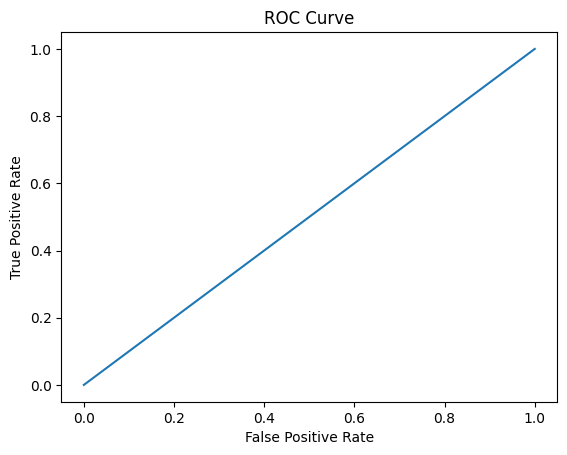

In [1341]:
fpr,tpr,thresholds=roc_curve(Y_test, Y_prob)

plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### OBSERVATIONS:

1.  X-axis → False Positive Rate

2.  Y-axis → True Positive Rate

3.  Curve closer to top-left = Better model

4.  This above graphs represents the best line of fit and states that with the increase in the False Positive Rate, there is an increase in True Positive Rate.

### Step 13: Test with Custom Sentence

In [1342]:
new_text = ["I really love this amazing course"]


### clean the text

cleaned_text = [clean_text(x) for x in new_text]


### Transform the text

transformed = tfidf.transform(cleaned_text)

### predict the model

prediction = log.predict(transformed)

print("Prediction:", "Positive" if prediction[0] == 1 else "Negative")

Prediction: Positive
